In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [4]:
data=pd.read_csv('C:/Users/theop\Documents/000AAA DATASCIENTIST/000 PROJET AUS\meteo_knn_imputer.csv')
X = data.drop('RainTomorrow', axis = 1)
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 16)

In [6]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
display(rf.score(X_train, y_train))
display(rf.score(X_test, y_test))
y_pred = rf.predict(X_test)

1.0

0.8606380027739251

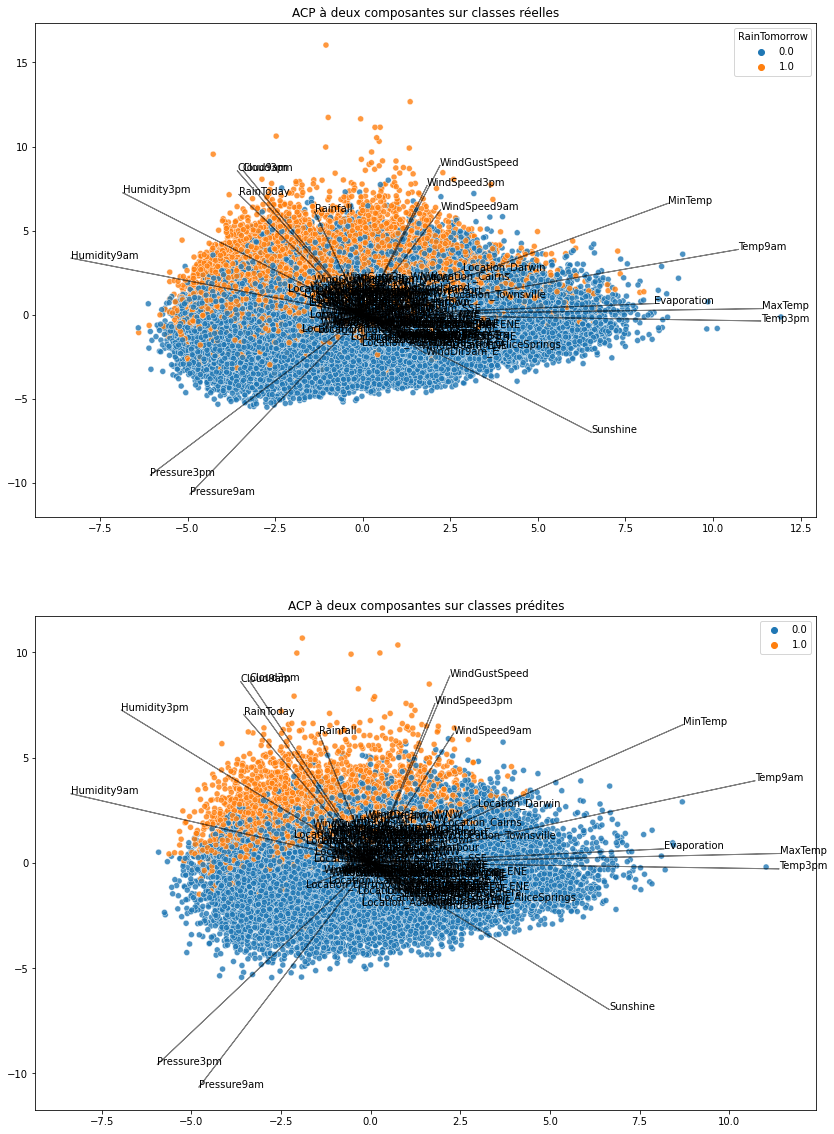

In [11]:
pca = PCA(n_components=2)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_new_train = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(14, 20))
n_train = X_train.shape[1]
plt.subplot(211)
sns.scatterplot(x=X_new_train[:, 0], y=X_new_train[:, 1], hue= y_train, alpha=0.8)
coeff = pca.components_.transpose()
for i in range(n_train):
    plt.arrow(0, 0, coeff[i, 0]*30, coeff[i, 1]*30,
              color='k', alpha=0.5, head_width=0.01, )
    plt.text(coeff[i, 0] * 30, coeff[i, 1] * 30, X_train.columns[i], color='k')
plt.title('ACP à deux composantes sur classes réelles')

X_test_scaled = scaler.fit_transform(X_test)
X_new_test = pca.fit_transform(X_test_scaled)

n_test = X_test.shape[1]
plt.subplot(212)
sns.scatterplot(x=X_new_test[:, 0], y=X_new_test[:, 1], hue= y_pred, alpha=0.8)
coeff = pca.components_.transpose()
for i in range(n_test):
    plt.arrow(0, 0, coeff[i, 0]*30, coeff[i, 1]*30,
              color='k', alpha=0.5, head_width=0.01, )
    plt.text(coeff[i, 0] * 30, coeff[i, 1] * 30, X_test.columns[i], color='k')
plt.title('ACP à deux composantes sur classes prédites');

In [8]:
data_pca = pd.DataFrame(pca.components_, columns = X_train.columns, index = ['PC1', 'PC2'])
data_pca

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
PC1,0.290618,0.380731,-0.048091,0.272471,0.221448,0.073473,0.077019,0.059652,-0.278321,-0.231656,...,-0.001789,0.002683,-0.043882,0.016236,-0.011251,-0.037604,-0.026792,-0.036284,-0.001503,-0.030869
PC2,0.219114,0.014697,0.205251,0.022009,-0.232407,0.295845,0.205181,0.252155,0.109336,0.241921,...,0.014022,0.039259,-0.013597,-0.029260,-0.020932,-0.018050,-0.014901,0.059509,0.072634,0.019241


In [10]:
print('Part de variance expliquée:', pca.explained_variance_ratio_)
print('Part de variance:', pca.explained_variance_)

Part de variance expliquée: [0.06279439 0.04116044]
Part de variance: [5.9657981  3.91045916]
